In [1]:

class decisionTree(object):
    
    def __init__(self):
        self.Tree = {}
        pass
    
    def calShannonEnt(self,dataSet):
        from math import log 
        labelCount = len(dataSet) #得到数据集总量
        labelDict = {} #创建标签字典
        #得到各标签的数量
        for feature_var in dataSet:
            label = feature_var[-1]
            if label not in labelDict.keys():
                labelDict[label]=1
            else:
                labelDict[label] += 1
        #计算香农熵
        shannonEnt = 0.0
        #对每一个标签的香农熵进行求和
       # print('$',end='')
        for key in labelDict:
            prob = float(labelDict[key]) / labelCount
            shannonEnt -= prob * log(prob,2)
            #print('-\\frac{%d}{%d} \log_2(\\frac{%d}{%d})'%(labelDict[key],labelCount,labelDict[key],labelCount),end='')
        #print('=%.4f$'%(shannonEnt))
        return shannonEnt
    
    def splitDataSet(self,dataSet,feature_index,feature_value):
        newDataSet = []
        for feature in dataSet:
            if(feature[feature_index] == feature_value):#如果此特征的值符合要求 将该列（特征数据）去掉 后的特征放入newdataset
                #去掉该特征所在列
                tmpFeature = feature[:feature_index]
                tmpFeature.extend(feature[feature_index+1:])
                #新的特征加入newdataset
                newDataSet.append(tmpFeature)
        return newDataSet
    
    
    def chooseBestFeatureToSplit(self,dataSet,feature_name):
        #获取特征数量 = 列数-标签(1)
        numFeature = len(dataSet[0])-1
        #计算节点总体的香农熵 Entropy(D)
        baseEnt = self.calShannonEnt(dataSet)
        #print('节点总体的香农熵 Entropy(D)',baseEnt)
        #假定最优信息增益与所对应特征的下标
        bestInfoGain = 0
        bestFeature = -1
        #遍历各个特征计算信息熵
        for feature_index in range(numFeature):
            #print('特征:',feature_name[feature_index])
            #得到该特征下的value的取值有几种情况
            feature_value_list = [feature[feature_index] for feature in dataSet]
            #去除重复
            valueKinds = set(feature_value_list)
            #子节点信息熵
            childEntSum = 0
            #子节点数量 = 特征取值种类
           # print('计算子节点信息熵:$Entropy(x)= -\sum_{i \in class}p(i|x)log_2p(i|x)$')
            tmp_str=''
            for value in valueKinds:
                #划分数据集
                subDataSet = self.splitDataSet(dataSet,feature_index,value)
                #归一化信息熵 的前缀  =  符合条件的数据 / 总共数据
                prob = len(subDataSet)/len(feature_value_list)
                #累加各子节点的归一化信息熵
                #print('Entropy(%s)'%(value) , end='')
                tmp =self.calShannonEnt(subDataSet)
                tmp_str+='-\\frac{%d}{%d}Entropy(%s)'%(len(subDataSet),len(feature_value_list),value)
                childEntSum += prob*tmp
            
            #计算节点的信息增益
            infoGain = baseEnt - childEntSum
            #print('节点【%s】的信息增益:'%(feature_name[feature_index]))
            gongshi_str='Gain(S,A=%s) = Entropy(S) - \sum_{v \in values(A)} \\frac{|S_v|}{|S|}Entropy(S_v)\\\='%(feature_name[feature_index])
            #print('$'+gongshi_str+'%.3f'%(baseEnt)+tmp_str+'=%.3f'%(infoGain)+'$')
            if(infoGain>=bestInfoGain):
                bestInfoGain = infoGain
                bestFeature = feature_index
        #print("-----------------------\n信息熵益最大的特征是:",feature_name[bestFeature],'\n')
        return bestFeature

    def majorityCnt(self,classList): 
        import operator  
        classCount={}  
        for vote in classList:  
            if vote not in classCount.keys(): classCount[vote] = 0  
            classCount[vote] += 1
        print(classCount)
        sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True) 
        #print('叶子节点类别为:',sortedClassCount[0][0] )
        return sortedClassCount[0][0]  
    
    def createTree(self,dataSet,feature_name):
        #获得数据集中的类别
        classList = [feature[-1] for feature in dataSet]
        #类别完全相同->停止划分
        if classList.count(classList[0])==len(classList):
           # print('叶子节点类别为:',classList[0])
            return classList[0]
        #遍历完所有特征->返回出现次数最多的类别
        if len(dataSet[0])==1:
            return self.majorityCnt(classList)
        #可递归情况
        #选择特征进行数据集划分
        bestFeature_index= self.chooseBestFeatureToSplit(dataSet,feature_name)
        bestFeature_name=feature_name[bestFeature_index]
        #生成节点（用字典的形式）
        myTree = {bestFeature_name:{}}
        #删除此特征
        #del(feature_name[bestFeature_index]) #这样写函数会改变原来的featue_name外部也改变
        subFeatureName=feature_name[0:bestFeature_index]
        subFeatureName.extend(feature_name[bestFeature_index+1:])
        #该特征对应的所有可能值
        featvalues = [feature[bestFeature_index] for feature in dataSet]
        uniqueValues = set(featvalues)
        #以该特征不同的取值作为子节点进行递归
        for value in uniqueValues:
            #访问字典元素 再以特征取值 生成键值对 形成递归
            #print(bestFeature_name+'的特征属性分支:',value)
            myTree[bestFeature_name][value] = self.createTree(self.splitDataSet(dataSet,bestFeature_index,value),subFeatureName)
       # print( bestFeature_name,'的所有分支递归结束')
        return myTree

    def classify(self,inputTree , feature_name , testdata):
        #特征节点 字典第一个关键字
        first_feature_name =list(inputTree.keys())[0]
        #子树
        chlidTree = inputTree[first_feature_name]
        #特征的索引
        feature_index = feature_name.index(first_feature_name)
        #遍历所有特征值
        for feature_value in chlidTree.keys():
            # test数据里面的此特征值与对应的相同
            if testdata[feature_index] == feature_value:
                #如果该特征的取值有子树 即还有分类 即递归调用
                if(type(chlidTree[feature_value]).__name__=='dict'):
                    classLabel = self.classify(chlidTree[feature_value],feature_name,testdata)
                else: #树叶节点 最终类别
                    classLabel = chlidTree[feature_value]
                return classLabel
        
    def train(self,trainData,feature_name):
        self.Tree = self.createTree(trainData,feature_name)
        self.feature_name = feature_name
    
    def predict(self,testData):
        pre=[]
        for testObj in testData:
            preLabel = self.classify(self.Tree,self.feature_name,testObj)
            pre.append(preLabel)
        return pre
    

In [2]:
import pandas as pd
import numpy as np 
#获取数据集
from sklearn.datasets import load_boston,load_iris
#选择模型
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier#entropy ID3算法 gini是CART算法

In [12]:
data = pd.read_csv('王者荣耀_离散值.csv')
# features_list  = np.array(data.columns)
# features_name = features_list[1:5].tolist()
# data = np.array(data)[:,1:].tolist()
data

,姓名,生存能力,攻击伤害,技能效果,上手难度,英雄定位
0,廉颇,高,低,中,低,坦克
1,小乔,低,低,高,低,法师
2,赵云,中,中,中,中,战士
3,墨子,中,中,中,中,法师
4,妲己,低,低,高,低,法师
...,...,...,...,...,...,...
104,艾琳,低,高,中,中,射手
105,云缨,中,高,高,高,战士
106,金蝉,低,高,中,低,法师
107,暃,中,高,中,中,刺客


In [4]:
mytree = decisionTree()
mytree.train(data,features_name)

{'战士': 6, '法师': 1, '刺客': 1}
{'法师': 3, '辅助': 1, '刺客': 1}
{'战士': 1, '法师': 1}
{'法师': 1, '战士': 1}
{'坦克': 4, '辅助': 2, '战士': 3}
{'法师': 1, '刺客': 1}
{'法师': 1, '刺客': 1}
{'战士': 3, '刺客': 3, '射手': 3}
{'刺客': 3, '战士': 3}
{'射手': 3, '刺客': 2}
{'射手': 1, '刺客': 1}
{'刺客': 1, '射手': 1}
{'射手': 2, '法师': 1}
{'辅助': 2, '法师': 1}
{'坦克': 2, '战士': 1, '辅助': 1}
{'坦克': 1, '辅助': 3, '战士': 1}


In [5]:
tree = mytree.Tree

In [10]:
# -*- coding: utf-8 -*-
"""
@author: 蔚蓝的天空Tom
Aim:得到决策树的字典后，需要使用python来绘制对应的决策树figure
输入决策树的字典，样例如下所示：
dtree = {'house?': {'hourse_no': {'working?': {'work_no': 'refuse', 'work_yes': 'agree'}}, 'hourse_yes': 'agree'}}
"""
 
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties # 步骤一
# ...
font1 = FontProperties(fname="/System/Library/Fonts/PingFang.ttc", size=6)

font2 = FontProperties(fname="/System/Library/Fonts/PingFang.ttc", size=7)
# import importlib
# import sys 
# importlib.reload(sys)
 
#定义判断结点形状,其中boxstyle表示文本框类型,fc指的是注释框颜色的深度
decisionNode = dict(boxstyle="round4", color='r', fc='0.9')
#定义叶结点形状
leafNode = dict(boxstyle="circle", color='m')
#定义父节点指向子节点或叶子的箭头形状
arrow_args = dict(arrowstyle="<-", color='g')
 
def plot_node(node_txt, center_point, parent_point, node_style):
    '''
    绘制父子节点，节点间的箭头，并填充箭头中间上的文本
    :param node_txt:文本内容
    :param center_point:文本中心点
    :param parent_point:指向文本中心的点
    '''
    createPlot.ax1.annotate(node_txt, 
                            xy=parent_point,
                            xycoords='axes fraction',
                            xytext=center_point,
                            textcoords='axes fraction',
                            va="center",
                            ha="center",
                            bbox=node_style,
                            arrowprops=arrow_args,
                            FontProperties=font1)
 
def get_leafs_num(tree_dict):
    '''
    获取叶节点的个数
    :param tree_dict:树的数据字典
    :return tree_dict的叶节点总个数
    '''
    #tree_dict的叶节点总数
    leafs_num = 0
    
    #字典的第一个键，也就是树的第一个节点
    root = list(tree_dict.keys())[0]
    #这个键所对应的值，即该节点的所有子树。
    child_tree_dict =tree_dict[root]
    for key in child_tree_dict.keys():
        #检测子树是否字典型
        if type(child_tree_dict[key]).__name__=='dict':
            #子树是字典型，则当前树的叶节点数加上此子树的叶节点数
            leafs_num += get_leafs_num(child_tree_dict[key])
        else:
            #子树不是字典型，则当前树的叶节点数加1
            leafs_num += 1
 
    #返回tree_dict的叶节点总数
    return leafs_num
 
def get_tree_max_depth(tree_dict):
    '''
    求树的最深层数
    :param tree_dict:树的字典存储
    :return tree_dict的最深层数
    '''
    #tree_dict的最深层数
    max_depth = 0
    
    #树的根节点
    root = list(tree_dict.keys())[0]
    #当前树的所有子树的字典
    child_tree_dict = tree_dict[root]
    
    for key in child_tree_dict.keys():
        #树的当前分支的层数
        this_path_depth = 0
        #检测子树是否字典型
        if type(child_tree_dict[key]).__name__ == 'dict':
            #如果子树是字典型，则当前分支的层数需要加上子树的最深层数
            this_path_depth = 1 + get_tree_max_depth(child_tree_dict[key])
        else:
            #如果子树不是字典型，则是叶节点，则当前分支的层数为1
            this_path_depth = 1
        if this_path_depth > max_depth:
            max_depth = this_path_depth
    
    #返回tree_dict的最深层数
    return max_depth
 
def plot_mid_text(center_point, parent_point, txt_str):
    '''
    计算父节点和子节点的中间位置，并在父子节点间填充文本信息
    :param center_point:文本中心点
    :param parent_point:指向文本中心点的点
    '''
    
    x_mid = (parent_point[0] - center_point[0])/2.0 + center_point[0]
    y_mid = (parent_point[1] - center_point[1])/2.0 + center_point[1]
    createPlot.ax1.text(x_mid, y_mid, txt_str,FontProperties=font2)
    return
 
def plotTree(tree_dict, parent_point, node_txt):
    '''
    绘制树
    :param tree_dict:树
    :param parent_point:父节点位置
    :param node_txt:节点内容
    '''
    
    leafs_num = get_leafs_num(tree_dict)
    root = list(tree_dict.keys())[0]
    #plotTree.totalW表示树的深度
    center_point = (plotTree.xOff+(1.0+float(leafs_num))/2.0/plotTree.totalW,plotTree.yOff)
    #填充node_txt内容
    plot_mid_text(center_point, parent_point, node_txt)
    #绘制箭头上的内容
    plot_node(root, center_point, parent_point, decisionNode)
    #子树
    child_tree_dict = tree_dict[root]
    plotTree.yOff=plotTree.yOff-1.0/plotTree.totalD
    #因从上往下画，所以需要依次递减y的坐标值，plotTree.totalD表示存储树的深度
    for key in child_tree_dict.keys():
        if type(child_tree_dict[key]).__name__ == 'dict':
            plotTree(child_tree_dict[key],center_point,str(key))
        else:
            plotTree.xOff=plotTree.xOff+1.0/plotTree.totalW
            plot_node(child_tree_dict[key],(plotTree.xOff,plotTree.yOff),center_point,leafNode)
            plot_mid_text((plotTree.xOff,plotTree.yOff),center_point,str(key))
    #h绘制完所有子节点后，增加全局变量Y的偏移
    plotTree.yOff=plotTree.yOff+1.0/plotTree.totalD
 
    return
 
def createPlot(tree_dict):
    '''
    绘制决策树图形
    :param tree_dict
    :return 无
    '''
    #设置绘图区域的背景色
    fig=plt.figure(1,facecolor='white')
    #清空绘图区域
    fig.clf()
    #定义横纵坐标轴,注意不要设置xticks和yticks的值!!!
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1=plt.subplot(111, frameon=False, **axprops)
    #由全局变量createPlot.ax1定义一个绘图区，111表示一行一列的第一个，frameon表示边框,**axprops不显示刻度
    plotTree.totalW=float(get_leafs_num(tree_dict))
    plotTree.totalD=float(get_tree_max_depth(tree_dict))
    plotTree.xOff=-0.5/plotTree.totalW;
    plotTree.yOff=1.0;
    plotTree(tree_dict, (0.5,1.0), '')
    plt.show()
    





<ipython-input-10-6ac9405e49a2>:109: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  createPlot.ax1.text(x_mid, y_mid, txt_str,FontProperties=font2)
<ipython-input-10-6ac9405e49a2>:34: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  createPlot.ax1.annotate(node_txt,


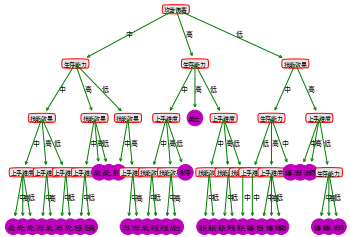

In [11]:
createPlot(tree)